# Students Exam Scores

This dataset includes scores from three test scores of students at a (fictional) public school and a variety of personal and socio-economic factors that may have interaction effects upon them.
Aim: Predicting Student Test Scores

### Data Dictionary (column description)

#### Gender: Gender of the student (male/female) 

#### EthnicGroup: Ethnic group of the student (group A to E)

#### ParentEduc: Parent(s) education background (from some_highschool to master's degree)
#### LunchType: School lunch type (standard or free/reduced)
#### TestPrep: Test preparation course followed (completed or none)
#### ParentMaritalStatus: Parent(s) marital status (married/single/widowed/divorced)
#### PracticeSport: How often the student parctice sport (never/sometimes/regularly))
#### IsFirstChild: If the child is first child in the family or not (yes/no)
#### NrSiblings: Number of siblings the student has (0 to 7)
#### TransportMeans: Means of transport to school (schoolbus/private)
#### WklyStudyHours: Weekly self-study hours(less that 5hrs; between 5 and 10hrs; more than 10hrs)
#### MathScore: math test score(0-100)
#### ReadingScore: reading test score(0-100)
#### WritingScore: writing test score(0-100)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [3]:
dataset=pd.read_csv('Expanded_data_with_more_features.csv')
dataset.head(5)

,,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75


# Preprocessing and  Visualization

In [4]:
dataset.shape

(30641, 15)

In [ ]:
dataset=dataset.drop('Unnamed: 0',axis=1)
dataset.head()

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0                        30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
dataset.describe() #list numeric

,,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [8]:
# fix Weekly study hours 
dataset['WklyStudyHours'].unique() 

array(['< 5', '10-May', '> 10', nan], dtype=object)

In [9]:
#delete nan in Weekly study hours 
#before delete the nan . i want see how many nulls in  Weekly study hours
dataset['WklyStudyHours'].isna().sum()

955

In [10]:
dataset['WklyStudyHours'].unique()
dataset.head()

,,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0                        30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [12]:
dataset.isna()

,,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30637,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
30638,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
30639,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
Q1 = dataset['NrSiblings'].quantile(0.25)
Q3 = dataset['NrSiblings'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


2.0


In [14]:
print(dataset['NrSiblings'].skew())

0.6762659287127112


In [15]:
median = dataset['NrSiblings'].median()

# Replace missing values with the median value
dataset['NrSiblings'].fillna(median, inplace=True)
print(median)

2.0


In [16]:
outliers = dataset[(dataset['NrSiblings'] < Q1 - 1.5*IQR) | (dataset['NrSiblings'] > Q3 + 1.5*IQR)]

# Replace outliers with the median value
median = dataset['NrSiblings'].median()
dataset.loc[outliers.index, 'NrSiblings'] = median

In [17]:
dataset['NrSiblings'] = dataset['NrSiblings'].astype(int)

In [18]:
dataset

,,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0,NaN,10-May,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1,NaN,10-May,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,10-May,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2,school_bus,10-May,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1,private,10-May,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1,private,10-May,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3,school_bus,10-May,82,90,93


In [19]:
#Fill NaN values at  columns by mode
mode = dataset['IsFirstChild'].mode()[0]
dataset['IsFirstChild'].fillna(mode, inplace=True)
mode = dataset['EthnicGroup'].mode()[0]
dataset['EthnicGroup'].fillna(mode, inplace=True)
mode = dataset['ParentEduc'].mode()[0]
dataset['ParentEduc'].fillna(mode, inplace=True)
mode = dataset['TestPrep'].mode()[0]
dataset['TestPrep'].fillna(mode, inplace=True)
mode = dataset['ParentMaritalStatus'].mode()[0] 
dataset['ParentMaritalStatus'].fillna(mode, inplace=True)
mode = dataset['PracticeSport'].mode()[0]
dataset['PracticeSport'].fillna(mode, inplace=True)
mode = dataset['TransportMeans'].mode()[0]
dataset['TransportMeans'].fillna(mode, inplace=True)

In [20]:
dataset.head(10)

,,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,none,married,sometimes,yes,0,school_bus,10-May,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1,school_bus,10-May,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,10-May,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1,school_bus,10-May,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1,private,10-May,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1,private,> 10,41,43,39
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3,private,> 10,65,64,68
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,2,private,< 5,37,59,50


In [21]:
#Add OverallScore column
dataset['OverallScore'] = round((dataset['MathScore'] + dataset['ReadingScore'] + dataset['WritingScore'])/3, 2)

In [22]:
 #Convert a float column to an object column
dataset['WklyStudyHours'] = dataset['WklyStudyHours'].astype(str)

In [23]:
mode = dataset['WklyStudyHours'].mode() # Calculate the median
dataset['WklyStudyHours'].fillna(mode, inplace=True) # Replace missing values with median

In [24]:
print(dataset.dtypes)

                         int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings               int32
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
OverallScore           float64
dtype: object


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0                        30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          30641 non-null  object 
 3   ParentEduc           30641 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             30641 non-null  object 
 6   ParentMaritalStatus  30641 non-null  object 
 7   PracticeSport        30641 non-null  object 
 8   IsFirstChild         30641 non-null  object 
 9   NrSiblings           30641 non-null  int32  
 10  TransportMeans       30641 non-null  object 
 11  WklyStudyHours       30641 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
 15  OverallScore         30641 non-null 

In [26]:
mode = dataset['WklyStudyHours'].mode()[0]
dataset['WklyStudyHours'].fillna(mode, inplace=True)

In [27]:
dataset_orig = dataset.copy()

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0                        30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          30641 non-null  object 
 3   ParentEduc           30641 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             30641 non-null  object 
 6   ParentMaritalStatus  30641 non-null  object 
 7   PracticeSport        30641 non-null  object 
 8   IsFirstChild         30641 non-null  object 
 9   NrSiblings           30641 non-null  int32  
 10  TransportMeans       30641 non-null  object 
 11  WklyStudyHours       30641 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
 15  OverallScore         30641 non-null 

In [29]:
dataset=dataset[['WklyStudyHours','MathScore','ReadingScore','WritingScore']]
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MathScore       22.0
ReadingScore    21.0
WritingScore    21.0
dtype: float64


C:\Users\1\AppData\Local\Temp\ipykernel_20760\4143420533.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataset.quantile(0.25)
C:\Users\1\AppData\Local\Temp\ipykernel_20760\4143420533.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataset.quantile(0.75)


In [30]:
print((dataset<(Q1 - 1.5*IQR))| dataset>Q3+1.5*IQR)

       MathScore  ReadingScore  WklyStudyHours  WritingScore
0          False         False           False         False
1          False         False           False         False
2          False         False           False         False
3          False         False           False         False
4          False         False           False         False
...          ...           ...             ...           ...
30636      False         False           False         False
30637      False         False           False         False
30638      False         False           False         False
30639      False         False           False         False
30640      False         False           False         False

[30641 rows x 4 columns]


C:\Users\1\AppData\Local\Temp\ipykernel_20760\3311528332.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print((dataset<(Q1 - 1.5*IQR))| dataset>Q3+1.5*IQR)


In [31]:
dataset_orig

,,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,OverallScore
0,0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74,72.00
1,1,female,group C,some college,standard,none,married,sometimes,yes,0,school_bus,10-May,69,90,88,82.33
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91,90.33
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1,school_bus,10-May,45,56,42,47.67
4,4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,10-May,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2,school_bus,10-May,59,61,65,61.67
30637,890,male,group E,high school,standard,none,single,regularly,no,1,private,10-May,58,53,51,54.00
30638,911,female,group C,high school,free/reduced,completed,married,sometimes,no,1,private,10-May,61,70,67,66.00
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3,school_bus,10-May,82,90,93,88.33


In [32]:
z_scores = np.abs((dataset['WritingScore'] - dataset['WritingScore'].mean()) / dataset['WritingScore'].std())

# Identify values that are more than 3 standard deviations from the mean
outliers = dataset_orig[z_scores > 3]

# Print the outliers
print(outliers)

            Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
55      59  female     group C    some high school  free/reduced     none   
69      76    male     group E    some high school      standard     none   
308    327    male     group A        some college  free/reduced     none   
565    596    male     group B         high school  free/reduced     none   
1484   566    male     group B    some high school  free/reduced     none   
...    ...     ...         ...                 ...           ...      ...   
27765  617    male     group B        some college      standard     none   
29000  947    male     group A        some college  free/reduced     none   
29817  843    male     group D         high school  free/reduced     none   
30389  834    male     group B  associate's degree  free/reduced     none   
30478  671    male     group D  associate's degree      standard     none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
55     

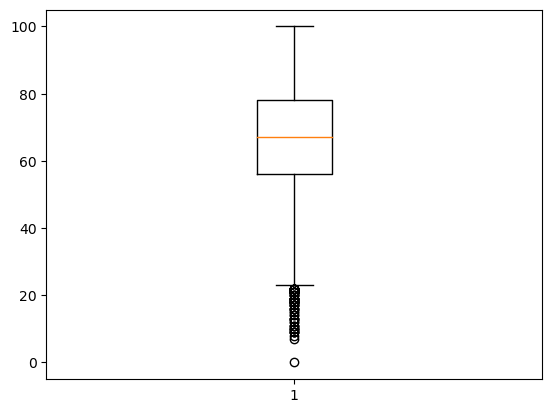

In [33]:
# Create a boxplot of the 'Math score' column
plt.boxplot(dataset['MathScore'])

# Show the plot
plt.show()

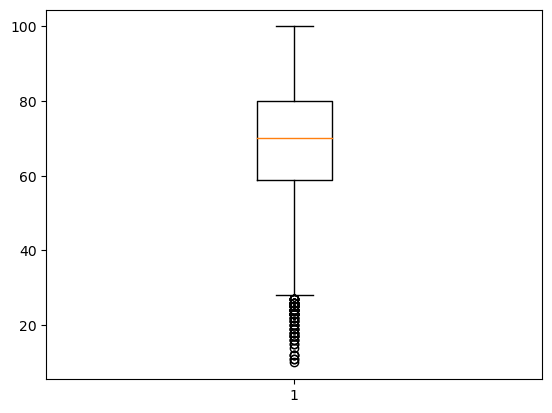

In [34]:
plt.boxplot(dataset['ReadingScore'])

# Show the plot
plt.show()

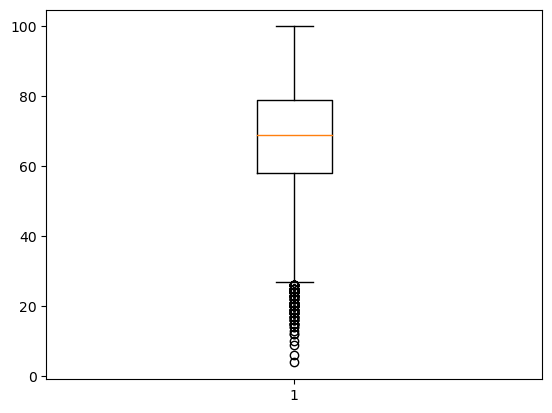

In [35]:
# Create a boxplot of the 'Math score' column
plt.boxplot(dataset['WritingScore'])

# Show the plot
plt.show()

In [36]:
dataset=dataset_orig

In [37]:
z_scores = np.abs((dataset['WritingScore'] - dataset['WritingScore'].mean()) / dataset['WritingScore'].std())

# Identify values that are more than 3 standard deviations from the mean
outliers =dataset [z_scores > 3]

# Print the outliers
print(outliers)


            Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
55      59  female     group C    some high school  free/reduced     none   
69      76    male     group E    some high school      standard     none   
308    327    male     group A        some college  free/reduced     none   
565    596    male     group B         high school  free/reduced     none   
1484   566    male     group B    some high school  free/reduced     none   
...    ...     ...         ...                 ...           ...      ...   
27765  617    male     group B        some college      standard     none   
29000  947    male     group A        some college  free/reduced     none   
29817  843    male     group D         high school  free/reduced     none   
30389  834    male     group B  associate's degree  free/reduced     none   
30478  671    male     group D  associate's degree      standard     none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
55     

Assigning the GPA to each Student

GPA	Grad
A	> 80
B	> 70
C	> 60
D	> 50
F	< 50

In [38]:
def GetGrade(OverallScore):
    if OverallScore >= 80:
        return 'A'
    elif OverallScore >= 70:
        return 'B'
    elif OverallScore >= 60:
        return 'C'
    elif OverallScore >= 50:
        return 'D'
    else:
        return 'F'


In [39]:
dataset['GPA'] = dataset.apply(lambda dataset : GetGrade(dataset['OverallScore']), axis= 1)
dataset.head(10) 

,,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,OverallScore,GPA
0,0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3,school_bus,< 5,71,71,74,72.00,B
1,1,female,group C,some college,standard,none,married,sometimes,yes,0,school_bus,10-May,69,90,88,82.33,A
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4,school_bus,< 5,87,93,91,90.33,A
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1,school_bus,10-May,45,56,42,47.67,F
4,4,male,group C,some college,standard,none,married,sometimes,yes,0,school_bus,10-May,76,78,75,76.33,B
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1,school_bus,10-May,73,84,79,78.67,B
6,6,female,group B,some college,standard,completed,widowed,never,no,1,private,10-May,85,93,89,89.00,A
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1,private,> 10,41,43,39,41.00,F
8,8,male,group D,high school,free/reduced,completed,single,sometimes,no,3,private,> 10,65,64,68,65.67,C
9,9,female,group B,high school,free/reduced,none,married,regularly,yes,2,private,< 5,37,59,50,48.67,F


In [40]:
#Are there any NaN value at Gender column
dataset['Gender'].isna().any()

False

In [41]:
#Finding the gender distribution
gender = np.array([0, 0])

for i in dataset['Gender']:
    if i == 'male':
        gender[0] += 1
    if i == 'female':
        gender[1] += 1

male = gender[0]
female = gender[1]
        
print(f"Male count: {male}")
print(f"Female count: {female}")

Male count: 15217
Female count: 15424


In [42]:
gender_colors = ['#e6e6fa','#008000']

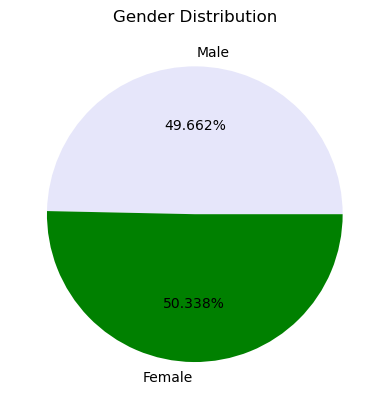

In [43]:
plt.pie(gender, autopct='%0.3f%%', colors=gender_colors, labels=['Male', 'Female'])
plt.title('Gender Distribution')
plt.show()

What is the relation between gender and scores?

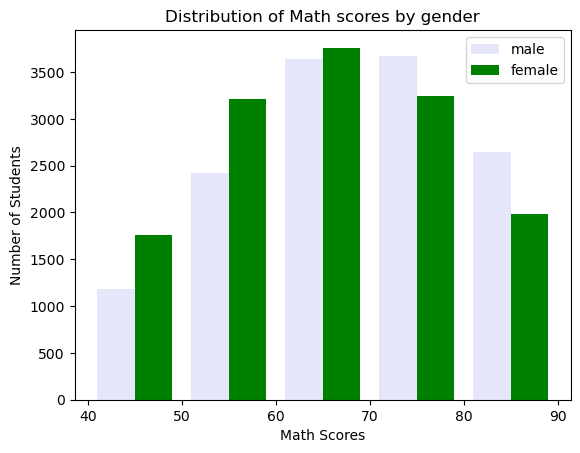

In [44]:
#Grouping Math scores by gender
male_math_scores = dataset[dataset['Gender'] == 'male']['MathScore'].tolist()
female_math_scores = dataset[dataset['Gender'] == 'female']['MathScore'].tolist()

plt.hist([male_math_scores, female_math_scores], bins=[40, 50, 60, 70, 80, 90], rwidth=0.8, color=gender_colors,label=['male', 'female'])
plt.xlabel('Math Scores')
plt.ylabel('Number of Students')
plt.title('Distribution of Math scores by gender')
plt.legend()
plt.show()

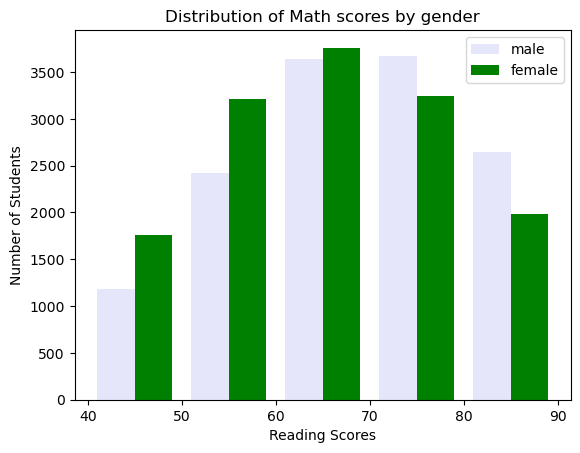

In [45]:
#Grouping Math scores by gender
male_reding_scores = dataset[dataset['Gender'] == 'male']['ReadingScore'].tolist()
female_reding_scores = dataset[dataset['Gender'] == 'female']['ReadingScore'].tolist()

plt.hist([male_math_scores, female_math_scores], bins=[40, 50, 60, 70, 80, 90], rwidth=0.8, color=gender_colors,label=['male', 'female'])
plt.xlabel('Reading Scores')
plt.ylabel('Number of Students')
plt.title('Distribution of Math scores by gender')
plt.legend()
plt.show()

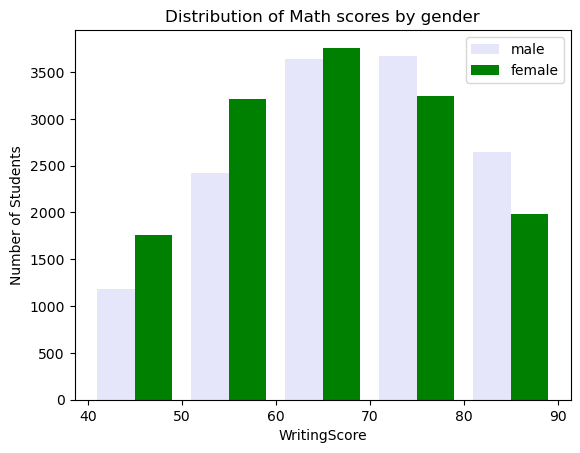

In [46]:
#Grouping Math scores by gender
male_reding_scores = dataset[dataset['Gender'] == 'male']['WritingScore'].tolist()
female_reding_scores = dataset[dataset['Gender'] == 'female']['WritingScore'].tolist()

plt.hist([male_math_scores, female_math_scores], bins=[40, 50, 60, 70, 80, 90], rwidth=0.8, color=gender_colors,label=['male', 'female'])
plt.xlabel('WritingScore')
plt.ylabel('Number of Students')
plt.title('Distribution of Math scores by gender')
plt.legend()
plt.show()

What is the group that contains the most number of students? group c

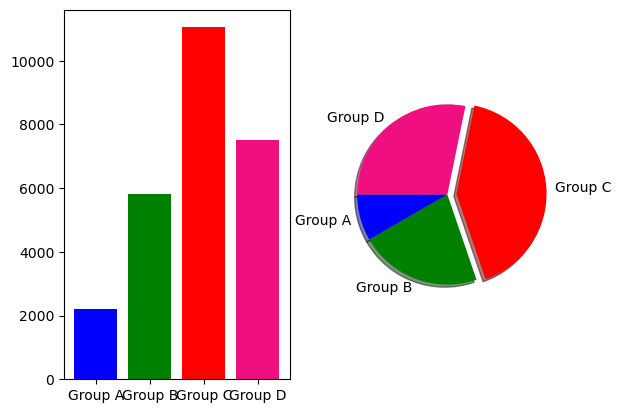

In [47]:
ethnicGroup=np.array([0,0,0,0])

for i in dataset["EthnicGroup"] :
    if i=="group A" :
        ethnicGroup[0]+=1
    if i=="group B" :
        ethnicGroup[1]+=1
    if i=="group C" :
        ethnicGroup[2]+=1
    if i=="group D" :
        ethnicGroup[3]+=1
        Label=["Group A","Group B","Group C","Group D"]

plt.subplot(1,2,1)
plt.bar(Label,ethnicGroup,color=("#0000ff","#008000","#ff0000","#f00f80"))
plt.subplot(1,2,2)
color1=("#0000ff","#008000","#ff0000","#f00f80")
exp=[0,0,0.1,0]
plt.pie(ethnicGroup,labels=Label,startangle=180,shadow=True,colors=color1,explode=exp)
plt.show()

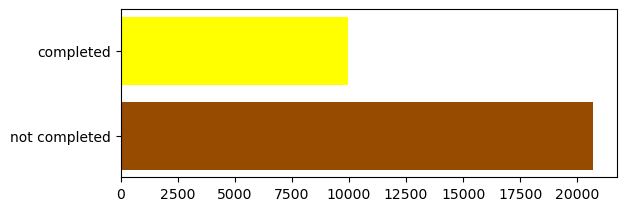

In [48]:
course=np.array([0,0])
info_course=["not completed","completed"]
for i in dataset["TestPrep"] :
    if i=="none" :
        course[0]+=1
    if i=="completed" :
        course[1]+=1
plt.subplot(2,1,1)
plt.barh(info_course,course,color=("#964b00","#ffff00"))


plt.show()

<BarContainer object of 4 artists>

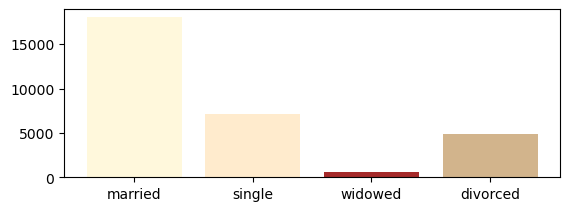

In [49]:
married=np.array([0,0,0,0])
label=["married","single","widowed","divorced"]

for i in dataset["ParentMaritalStatus"] :
    if i=="married" :
        married[0]+=1
    if i=="single" :
        married[1]+=1
    if i=="widowed" :
        married[2]+=1
    if i=="divorced" :
        married[3]+=1
        plt.subplot(2,1,1)

plt.bar(label,married,color=("#FFF8DC","#FFEBCD","#A52A2A","#D2B48C"))


<BarContainer object of 2 artists>

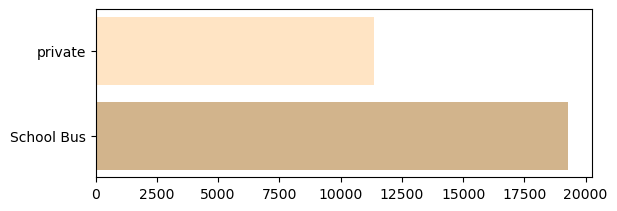

In [50]:
#travelling status 

travel=np.array([0,0])
label=["School Bus","private"]
for i in dataset["TransportMeans"] :
    if i=="school_bus" :
        travel[0]+=1
    if i=="private" :
        travel[1]+=1
plt.subplot(2,1,1)
plt.barh(label,travel,color=("#D2B48C","#FFE4C4"))


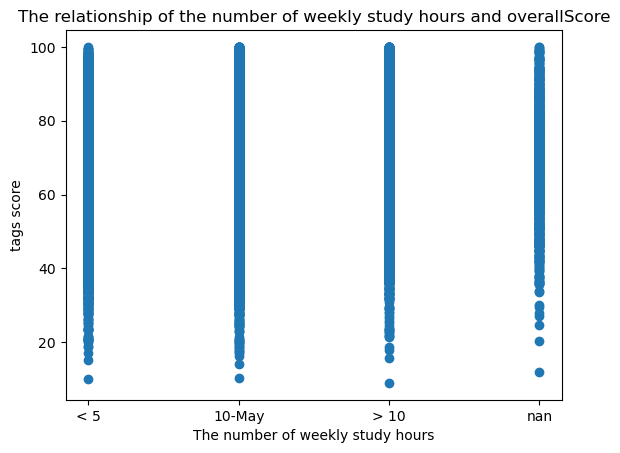

In [51]:
#Correlation between the number of weekly study hours and ovrallscore students
plt.scatter(dataset['WklyStudyHours'], dataset['OverallScore'])
plt.xlabel('The number of weekly study hours')
plt.ylabel('tags score')
plt.title('The relationship of the number of weekly study hours and overallScore')
plt.show()

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0                        30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          30641 non-null  object 
 3   ParentEduc           30641 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             30641 non-null  object 
 6   ParentMaritalStatus  30641 non-null  object 
 7   PracticeSport        30641 non-null  object 
 8   IsFirstChild         30641 non-null  object 
 9   NrSiblings           30641 non-null  int32  
 10  TransportMeans       30641 non-null  object 
 11  WklyStudyHours       30641 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
 15  OverallScore         30641 non-null 

# Analysis and Visualization

### 1-What is the distribution of students by gender and first group?

In [53]:
gender_ethnicity_distribution = dataset.groupby(['Gender', 'EthnicGroup']).size().unstack()
# Extract the distribution of students by gender and ethnic group
gender_ethnicity_distribution

EthnicGroup,group A,group B,group C,group D,group E
Gender,,,,,
female,1123,2959,5538,3768,2036
male,1096,2867,5514,3735,2005


### 2-What is the most educational degree that parents hold for students?

In [54]:
parent_education_distribution = dataset['ParentEduc'].value_counts(normalize=True)
#Obtaining the most educational degree held by parents
most_common_education = parent_education_distribution.idxmax()
most_common_education

'some college'

### 3-Is there a difference in academic performance between male and female students?

Calculate average math =  Gender
female    64.080654
male      69.069856
Name: MathScore, dtype: float64

 Calculate average reading =  Gender
female    72.853216
male      65.854571
Name: ReadingScore, dtype: float64

 Calculate average writing =  Gender
female    72.856457
male      63.920418
Name: WritingScore, dtype: float64


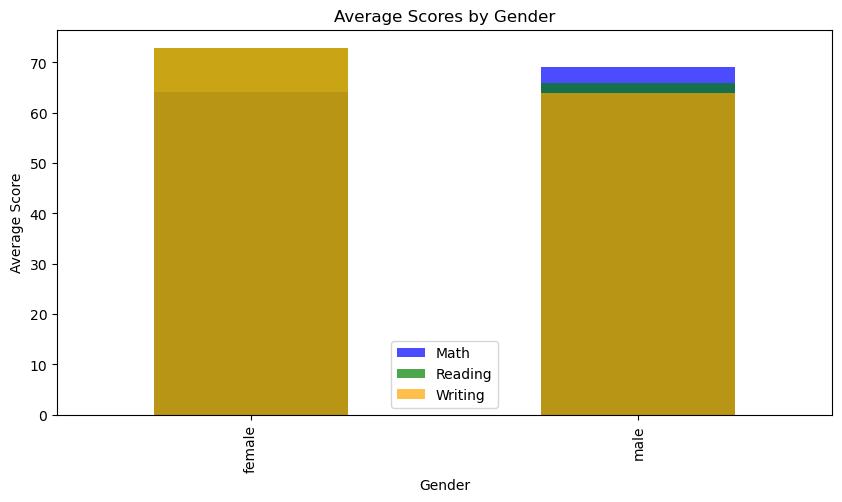

In [55]:
# Calculating the average math scores for male and female students
average_math_scores = dataset.groupby('Gender')['MathScore'].mean()

# Calculating the average reading scores for male and female students
average_reading_scores = dataset.groupby('Gender')['ReadingScore'].mean()

# Calculating average writing scores for male and female students
average_writing_scores = dataset.groupby('Gender')['WritingScore'].mean()

print("Calculate average math = ",average_math_scores)
print("\n Calculate average reading = ",average_reading_scores)
print("\n Calculate average writing = ",average_writing_scores)


plt.figure(figsize=(10, 5))
average_math_scores.plot(kind='bar', color='blue', alpha=0.7, label='Math')
average_reading_scores.plot(kind='bar', color='green', alpha=0.7, label='Reading')
average_writing_scores.plot(kind='bar', color='orange', alpha=0.7, label='Writing')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.title('Average Scores by Gender')
plt.legend()
plt.show()


### 4-Does exercise affect students' performance in exams?

Calculate average math =  PracticeSport
never        64.171079
regularly    67.839155
sometimes    66.289258
Name: MathScore, dtype: float64

 Calculate average reading =  PracticeSport
never        68.337662
regularly    69.943019
sometimes    69.255112
Name: ReadingScore, dtype: float64

 Calculate average writing =  PracticeSport
never        66.522727
regularly    69.604003
sometimes    68.090255
Name: WritingScore, dtype: float64


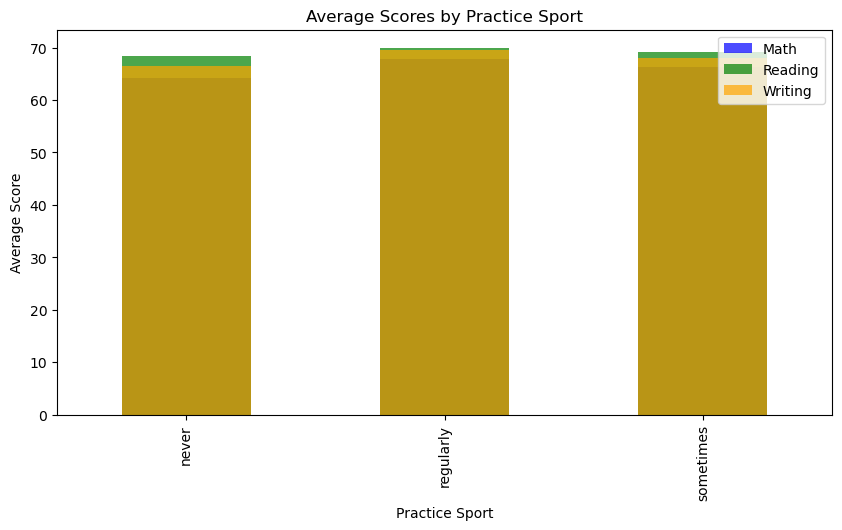

In [56]:
# Calculate the average score of students who exercise and students who do not exercise in mathematics
average_math_scores = dataset.groupby('PracticeSport')['MathScore'].mean()
# Calculate the average score of students who exercise and students who do not exercise in reading
average_reading_scores = dataset.groupby('PracticeSport')['ReadingScore'].mean()
# Calculate the average score of students who exercise and students who do not exercise in writing
average_writing_scores = dataset.groupby('PracticeSport')['WritingScore'].mean()
print("Calculate average math = ",average_math_scores)
print("\n Calculate average reading = ",average_reading_scores)
print("\n Calculate average writing = ",average_writing_scores)
plt.figure(figsize=(10, 5))
average_math_scores.plot(kind='bar', color='blue', alpha=0.7, label='Math')
average_reading_scores.plot(kind='bar', color='green', alpha=0.7, label='Reading')
average_writing_scores.plot(kind='bar', color='orange', alpha=0.7, label='Writing')
plt.xlabel('Practice Sport')
plt.ylabel('Average Score')
plt.title('Average Scores by Practice Sport')
plt.legend()
plt.show()


### 5-Does the type of lunch affect students' performance in exams?

Calculate average math =  LunchType
free/reduced    58.862332
standard        70.709370
Name: MathScore, dtype: float64

 Calculate average reading =  LunchType
free/reduced    64.189735
standard        72.175634
Name: ReadingScore, dtype: float64

 Calculate average writing =  LunchType
free/reduced    62.650522
standard        71.529716
Name: WritingScore, dtype: float64


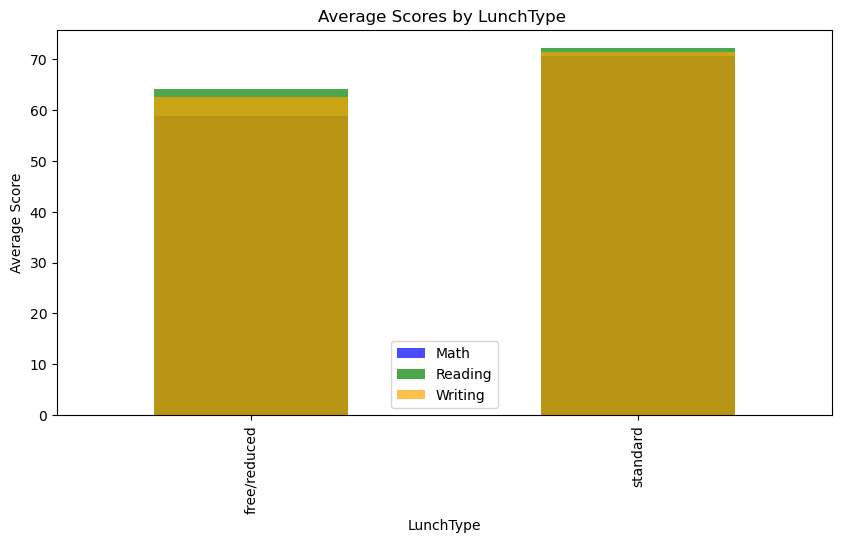

In [57]:
# Calculate the average score of students who eat and students who do not eat lunch in mathematics
average_math_scores = dataset.groupby('LunchType')['MathScore'].mean()
# Calculate the average score of students who eat and students who do not eat lunchin reading
average_reading_scores = dataset.groupby('LunchType')['ReadingScore'].mean()
# Calculate the average score of students who eat and students who do not eat lunch in writing
average_writing_scores = dataset.groupby('LunchType')['WritingScore'].mean()
print("Calculate average math = ",average_math_scores)
print("\n Calculate average reading = ",average_reading_scores)
print("\n Calculate average writing = ",average_writing_scores)
plt.figure(figsize=(10, 5))
average_math_scores.plot(kind='bar', color='blue', alpha=0.7, label='Math')
average_reading_scores.plot(kind='bar', color='green', alpha=0.7, label='Reading')
average_writing_scores.plot(kind='bar', color='orange', alpha=0.7, label='Writing')
plt.xlabel('LunchType')
plt.ylabel('Average Score')
plt.title('Average Scores by LunchType ')
plt.legend()
plt.show()


### 6-Is there a difference in academic performance between the older and younger children in the family?

Calculate average math =  IsFirstChild
no     66.246832
yes    66.724507
Name: MathScore, dtype: float64

 Calculate average reading =  IsFirstChild
no     69.132614
yes    69.508106
Name: ReadingScore, dtype: float64

 Calculate average writing =  IsFirstChild
no     68.210887
yes    68.529371
Name: WritingScore, dtype: float64


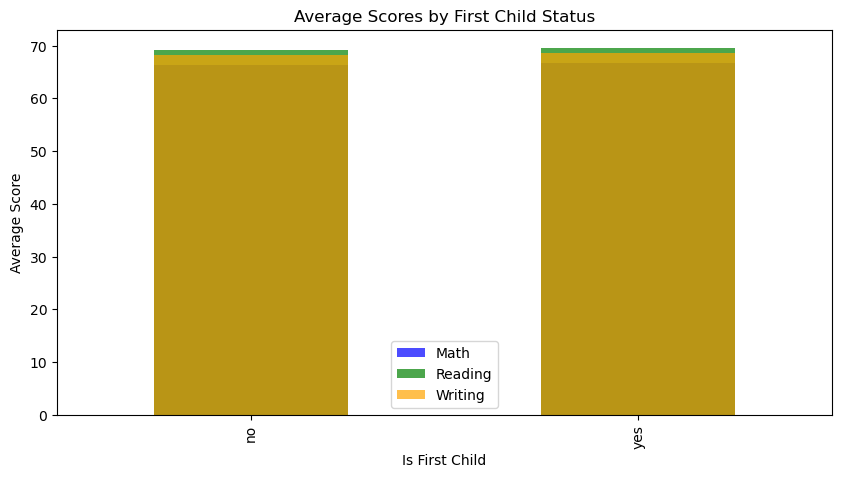

In [58]:
# Calculate the average score of older children younger children in mathematics
average_math_scores = dataset.groupby('IsFirstChild')['MathScore'].mean()
# Calculating the average score of older children and younger children in reading
average_reading_scores = dataset.groupby('IsFirstChild')['ReadingScore'].mean()

# Calculating the average score of older children and younger children in writing
average_writing_scores = dataset.groupby('IsFirstChild')['WritingScore'].mean()

print("Calculate average math = ",average_math_scores)
print("\n Calculate average reading = ",average_reading_scores)
print("\n Calculate average writing = ",average_writing_scores)

plt.figure(figsize=(10, 5))
average_math_scores.plot(kind='bar', color='blue', alpha=0.7, label='Math')
average_reading_scores.plot(kind='bar', color='green', alpha=0.7, label='Reading')
average_writing_scores.plot(kind='bar', color='orange', alpha=0.7, label='Writing')
plt.xlabel('Is First Child')
plt.ylabel('Average Score')
plt.title('Average Scores by First Child Status')
plt.legend()
plt.show()


### 7-Is there a relationship between math scores and reading and writing?

In [59]:
math_scores = dataset['MathScore']
reading_scores = dataset['ReadingScore']
writing_scores = dataset['WritingScore']
# Calculate the correlation coefficient between math and reading scores
math_reading_correlation = math_scores.corr(reading_scores)
# Calculate the correlation coefficient between math and writing scores
math_writing_correlation = math_scores.corr(writing_scores)
# Calculate the correlation coefficient between reading and writing scores
reading_writing_correlation = reading_scores.corr(writing_scores)
print("the correlation coefficient between math and reading scores = ", math_reading_correlation)
print("the correlation coefficient between math and writing scores = ", math_writing_correlation)
print("the correlation coefficient between reading and writing scores = ", reading_writing_correlation)


the correlation coefficient between math and reading scores =  0.8178248822215041
the correlation coefficient between math and writing scores =  0.8071182117316607
the correlation coefficient between reading and writing scores =  0.9525844244682473


### 8-Is there a change in student performance across class groups?

In [60]:
grouped_data = dataset.groupby('EthnicGroup').mean()[['MathScore', 'ReadingScore', 'WritingScore']]
grouped_data


C:\Users\1\AppData\Local\Temp\ipykernel_20760\94630739.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = dataset.groupby('EthnicGroup').mean()[['MathScore', 'ReadingScore', 'WritingScore']]


,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group A,62.991888,66.787742,65.251915
group B,63.490216,67.320460,65.895125
group C,64.943811,68.517734,67.149294
group D,67.666400,70.382247,70.890844
group E,75.298936,74.251423,72.677060


### 9-Is there a difference in students' performance according to the means of transportation they use to go to school?

In [61]:
Transport_data = dataset.groupby('TransportMeans').mean()[['MathScore', 'ReadingScore', 'WritingScore']]
Transport_data

C:\Users\1\AppData\Local\Temp\ipykernel_20760\359120764.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Transport_data = dataset.groupby('TransportMeans').mean()[['MathScore', 'ReadingScore', 'WritingScore']]


,MathScore,ReadingScore,WritingScore
TransportMeans,,,
private,66.511354,69.472364,68.509593
school_bus,66.586130,69.321645,68.365009


### 10-Which gender records the most in mathscore , readingscores and writingscores ?

In [62]:
# Filter the data by gender and find the maximum math score
max_math_score = dataset[dataset['MathScore'] == dataset['MathScore'].max()]['Gender'].values[0]
max_reading_scores =dataset[dataset['ReadingScore'] == dataset['ReadingScore'].max()]['Gender'].values[0]
writing_scores=dataset[dataset['WritingScore'] == dataset['WritingScore'].max()]['Gender'].values[0]
# Print the gender with the highest math score
print("The gender with the highest math score is:", max_math_score)
print("The gender with the highest reading score is:", max_reading_scores)
print("The gender with the highest writing score is:", writing_scores)

The gender with the highest math score is: male
The gender with the highest reading score is: female
The gender with the highest writing score is: female


### 11-Is there a relationship between the number of siblings and academic performance?

In [63]:
# Extract the number of siblings and academic scores
siblings = dataset['NrSiblings']
math_scores = dataset['MathScore']
reading_scores = dataset['ReadingScore']
writing_scores = dataset['WritingScore']
# Calculate the correlation coefficient between the number of siblings and math scores
siblings_math_correlation = siblings.corr(math_scores)
# Calculate the correlation coefficient between the number of siblings and reading scores
siblings_reading_correlation = siblings.corr(reading_scores)
# Calculate the correlation coefficient between the number of siblings and writing scores
siblings_writing_correlation = siblings.corr(writing_scores)
print("Correlation coefficient between number of siblings and math scores:", siblings_math_correlation)
print("Correlation coefficient between number of siblings and reading scores:", siblings_reading_correlation)
print("Correlation coefficient between number of siblings and writing scores:", siblings_writing_correlation)

Correlation coefficient between number of siblings and math scores: -0.003591290298204522
Correlation coefficient between number of siblings and reading scores: -0.001927536896270918
Correlation coefficient between number of siblings and writing scores: -0.003824167890127415


### 12-Is there a relation between being the first Child and mathScore , readingScore and writingScore?

In [64]:
# Function to determine if the student is the firstborn or not
def is_firstchild(value):
    if value == 'yes':
        return 'Yes'
    else:
        return 'No'

# Group the data by being the firstborn and calculate the mean scores
grouped_data_child = dataset.groupby('IsFirstChild').mean()[['MathScore', 'ReadingScore', 'WritingScore']]
grouped_data_child


C:\Users\1\AppData\Local\Temp\ipykernel_20760\1138204917.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_child = dataset.groupby('IsFirstChild').mean()[['MathScore', 'ReadingScore', 'WritingScore']]


,MathScore,ReadingScore,WritingScore
IsFirstChild,,,
no,66.246832,69.132614,68.210887
yes,66.724507,69.508106,68.529371


### 14-Is there a relation between being the only child and scores?

In [65]:
# Calculate the mean scores for students who are the only child
only_child_scores = dataset[dataset['NrSiblings'] == 0][['MathScore', 'ReadingScore', 'WritingScore']].mean()

# Calculate the mean scores for students who have siblings
sibling_scores = dataset[dataset['NrSiblings'] > 0][['MathScore', 'ReadingScore', 'WritingScore']].mean()

print("Mean scores for students who are the only child: \n",only_child_scores)

print("\nMean scores for students who have siblings: \n",sibling_scores)



Mean scores for students who are the only child: 
 MathScore       66.819449
ReadingScore    69.547812
WritingScore    68.746515
dtype: float64

Mean scores for students who have siblings: 
 MathScore       66.529177
ReadingScore    69.358470
WritingScore    68.381913
dtype: float64


### 15-What is the overall score  for male and female students separately?

In [66]:
male_overall_score = dataset[dataset['Gender'] == 'male']['OverallScore'].mean()
female_overall_score = dataset[dataset['Gender'] == 'female']['OverallScore'].mean()
print("mean_male_overall_score : ", male_overall_score)
print("mean_female_overall_score : ", female_overall_score)


mean_male_overall_score :  66.28160018400473
mean_female_overall_score :  69.93009465767634


### 16-What is the average general total for students who come from unmarried families? 

In [67]:
single_avg_overall_score = dataset[dataset['ParentMaritalStatus'] == 'single']['OverallScore'].mean()
print("mean_single", single_avg_overall_score)

mean_single 67.83244187684937


### 17-Is there a correlation between marks in mathscore , writingscore , readingscore and Overallscore?

In [68]:
correlation_math = dataset['MathScore'].corr(dataset['OverallScore'])
print("correlation between marks in mathematics and Overallscore : ",correlation_math)
correlation_writing = dataset['WritingScore'].corr(dataset['OverallScore'])
print("correlation between marks in reading and Overallscore : ",correlation_writing)
correlation_reading = dataset['ReadingScore'].corr(dataset['OverallScore'])
print("correlation between marks in writing and Overallscore : ",correlation_reading)



correlation between marks in mathematics and Overallscore :  0.9200611316874693
correlation between marks in reading and Overallscore :  0.9662921579656782
correlation between marks in writing and Overallscore :  0.969336935520888


### 18-Which gender records the most in overallscore?

In [69]:
max_OverallScore = dataset[dataset['OverallScore'] == dataset['OverallScore'].max()]['Gender'].values[0]
# Print the gender with the highest overall score
print("The gender with the highest overall is:", max_OverallScore)

The gender with the highest overall is: female


### 19-What is the ratio of male and female students in the data?

In [70]:
gender_counts = dataset['Gender'].value_counts()
male_percentage = (gender_counts['male'] / dataset.shape[0]) * 100
female_percentage = (gender_counts['female'] / dataset.shape[0]) * 100
print("percentage of male students:%",format(male_percentage))
print("percentage of Female students:%",format(female_percentage))

percentage of male students:% 49.6622172905584
percentage of Female students:% 50.337782709441605


### 20-How many students pass in mathscore , writingscore and readingscore?

In [71]:
# Define the passing mathscore
passing_math = 50
# Check if each student passes in all exams
passing_students_math = dataset[
    (dataset['MathScore'] >= passing_math)
]
# Get the count of passing students
passing_students_countMath = passing_students_math.shape[0]
print("Number of students who pass in Math exams:", passing_students_countMath)

# Define the passing writingscore
passing_write = 50
# Check if each student passes in all exams
passing_students_write = dataset[
    (dataset['WritingScore'] >= passing_write)
]
# Get the count of passing students
passing_students_countWrite = passing_students_write.shape[0]
print("Number of students who pass in Writing exams:", passing_students_countWrite)

# Define the passing readingscore
passing_Read = 50
# Check if each student passes in all exams
passing_students_Read = dataset[
    (dataset['WritingScore'] >= passing_Read)
]
# Get the count of passing students
passing_students_countRead = passing_students_write.shape[0]
print("Number of students who pass in Writing exams:", passing_students_countRead)


Number of students who pass in Math exams: 26405
Number of students who pass in Writing exams: 27093
Number of students who pass in Writing exams: 27093


### 21-How many students pass in all exams?

In [72]:
# Define the passing threshold
passing_threshold = 50
# Check if each student passes in all exams
passing_students = dataset[
    (dataset['MathScore'] >= passing_threshold) &
    (dataset['ReadingScore'] >= passing_threshold) &
    (dataset['WritingScore'] >= passing_threshold)
]
# Get the count of passing students
passing_students_count = passing_students.shape[0]
print("Number of students who pass in all exams:", passing_students_count)


Number of students who pass in all exams: 24947


### 22-How many parent_educ_counts are in ParentEduc?

In [73]:
gender_parent_educ_counts = dataset['ParentEduc'].value_counts()
gender_parent_educ_counts

some college          8478
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: ParentEduc, dtype: int64

### 23-Max and Min in ParentEduc?

In [74]:
max_parent_educ = dataset['ParentEduc'].max()
min_parent_educ = dataset['ParentEduc'].min()
print("Maximum value in ParentEduc:", max_parent_educ)
print("Minimum value in ParentEduc:", min_parent_educ)

Maximum value in ParentEduc: some high school
Minimum value in ParentEduc: associate's degree


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0                        30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          30641 non-null  object 
 3   ParentEduc           30641 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             30641 non-null  object 
 6   ParentMaritalStatus  30641 non-null  object 
 7   PracticeSport        30641 non-null  object 
 8   IsFirstChild         30641 non-null  object 
 9   NrSiblings           30641 non-null  int32  
 10  TransportMeans       30641 non-null  object 
 11  WklyStudyHours       30641 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
 15  OverallScore         30641 non-null 

# Machine Learning 

In [76]:
encoder = LabelEncoder()

In [77]:
dataset['TransportMeans'] =encoder.fit_transform(dataset['TransportMeans'])

In [78]:
dataset['IsFirstChild'] =encoder.fit_transform(dataset['IsFirstChild'])

In [79]:
dataset['PracticeSport'] =encoder.fit_transform(dataset['PracticeSport'])

In [80]:
dataset['ParentMaritalStatus'] =encoder.fit_transform(dataset['ParentMaritalStatus'])

In [81]:
dataset['TestPrep'] =encoder.fit_transform(dataset['TestPrep'])

In [82]:
dataset['LunchType'] =encoder.fit_transform(dataset['LunchType'])

In [83]:
dataset['ParentEduc'] =encoder.fit_transform(dataset['ParentEduc'])

In [84]:
dataset['EthnicGroup'] =encoder.fit_transform(dataset['EthnicGroup'])

In [85]:
dataset['Gender'] =encoder.fit_transform(dataset['Gender'])

In [86]:
dataset['LunchType'] =encoder.fit_transform(dataset['LunchType'])

In [87]:
x=dataset.drop(['OverallScore','GPA','WklyStudyHours'],axis=1)
y=dataset['OverallScore']

In [88]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [89]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)

lr_score= r2_score(y_test,y_pred) # calculate accuracy of the model
lr_score

0.9999999639354423

In [90]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0                        30641 non-null  int64  
 1   Gender               30641 non-null  int32  
 2   EthnicGroup          30641 non-null  int32  
 3   ParentEduc           30641 non-null  int32  
 4   LunchType            30641 non-null  int64  
 5   TestPrep             30641 non-null  int32  
 6   ParentMaritalStatus  30641 non-null  int32  
 7   PracticeSport        30641 non-null  int32  
 8   IsFirstChild         30641 non-null  int32  
 9   NrSiblings           30641 non-null  int32  
 10  TransportMeans       30641 non-null  int32  
 11  WklyStudyHours       30641 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
 15  OverallScore         30641 non-null 

In [103]:
dataset['WklyStudyHours'] =encoder.fit_transform(dataset['WklyStudyHours'])

In [104]:
y_pred1 = lr.predict(X_test)

In [105]:
print( metrics.r2_score(y_test,y_pred1))


0.9999999650683099
